<a href="https://colab.research.google.com/github/JungHunL22/Machine-Learning/blob/master/Deep-Learning%20%EB%B3%B5%EC%8A%B5/%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%ED%95%A0(Transpose%EC%B8%B5_%EC%B6%94%EA%B0%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -P /content/drive/MyDrive/Colab Notebooks/data/oxford http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget -P /content/drive/MyDrive/Colab Notebooks/data/oxford http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz


--2023-03-09 13:55:41--  http://notebooks/data/oxford
Resolving notebooks (notebooks)... failed: Name or service not known.
wget: unable to resolve host address ‘notebooks’
--2023-03-09 13:55:41--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2023-03-09 13:55:42--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz [following]
--2023-03-09 13:55:43--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots

In [3]:
!tar -xf /content/drive/MyDrive/Colab/images.tar.gz -C 
!tar -xf /content/drive/MyDrive/Colab/annotations.tar.gz

In [6]:
import os
dir_1='images/'
dir_2='annotations/trimaps'


In [8]:
dir_1_path=sorted([os.path.join(dir_1,fname) for fname in os.listdir(dir_1) if fname.endswith('.jpg')])
dir_2_path=sorted([os.path.join(dir_2,fname) for fname in os.listdir(dir_2) if fname.endswith('.png') and not fname.startswith(".")])

In [9]:
dir_1_path

['images/Abyssinian_1.jpg',
 'images/Abyssinian_10.jpg',
 'images/Abyssinian_100.jpg',
 'images/Abyssinian_101.jpg',
 'images/Abyssinian_102.jpg',
 'images/Abyssinian_103.jpg',
 'images/Abyssinian_104.jpg',
 'images/Abyssinian_105.jpg',
 'images/Abyssinian_106.jpg',
 'images/Abyssinian_107.jpg',
 'images/Abyssinian_108.jpg',
 'images/Abyssinian_109.jpg',
 'images/Abyssinian_11.jpg',
 'images/Abyssinian_110.jpg',
 'images/Abyssinian_111.jpg',
 'images/Abyssinian_112.jpg',
 'images/Abyssinian_113.jpg',
 'images/Abyssinian_114.jpg',
 'images/Abyssinian_115.jpg',
 'images/Abyssinian_116.jpg',
 'images/Abyssinian_117.jpg',
 'images/Abyssinian_118.jpg',
 'images/Abyssinian_119.jpg',
 'images/Abyssinian_12.jpg',
 'images/Abyssinian_120.jpg',
 'images/Abyssinian_121.jpg',
 'images/Abyssinian_122.jpg',
 'images/Abyssinian_123.jpg',
 'images/Abyssinian_124.jpg',
 'images/Abyssinian_125.jpg',
 'images/Abyssinian_126.jpg',
 'images/Abyssinian_127.jpg',
 'images/Abyssinian_128.jpg',
 'images/Abyssi

In [10]:
dir_2_path

['annotations/trimaps/Abyssinian_1.png',
 'annotations/trimaps/Abyssinian_10.png',
 'annotations/trimaps/Abyssinian_100.png',
 'annotations/trimaps/Abyssinian_101.png',
 'annotations/trimaps/Abyssinian_102.png',
 'annotations/trimaps/Abyssinian_103.png',
 'annotations/trimaps/Abyssinian_104.png',
 'annotations/trimaps/Abyssinian_105.png',
 'annotations/trimaps/Abyssinian_106.png',
 'annotations/trimaps/Abyssinian_107.png',
 'annotations/trimaps/Abyssinian_108.png',
 'annotations/trimaps/Abyssinian_109.png',
 'annotations/trimaps/Abyssinian_11.png',
 'annotations/trimaps/Abyssinian_110.png',
 'annotations/trimaps/Abyssinian_111.png',
 'annotations/trimaps/Abyssinian_112.png',
 'annotations/trimaps/Abyssinian_113.png',
 'annotations/trimaps/Abyssinian_114.png',
 'annotations/trimaps/Abyssinian_115.png',
 'annotations/trimaps/Abyssinian_116.png',
 'annotations/trimaps/Abyssinian_117.png',
 'annotations/trimaps/Abyssinian_118.png',
 'annotations/trimaps/Abyssinian_119.png',
 'annotations/t

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img,img_to_array

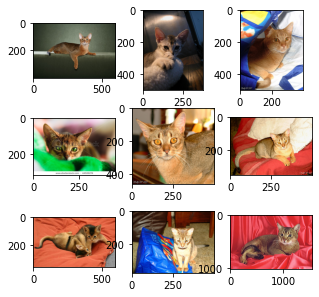

In [22]:

plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(load_img(dir_1_path[i]))

In [28]:
def disp(x):
  array=(x.astype('uint8')-1)*127
  plt.axis('off')
  plt.imshow(array[:,:,0])

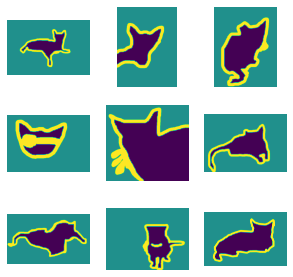

In [30]:
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  disp(img_to_array(load_img(dir_2_path[i])))

In [45]:
import numpy as np
import random

In [46]:
img_size = (200, 200)
num_imgs = len(dir_1_path)

random.Random(1337).shuffle(dir_1_path)
random.Random(1337).shuffle(dir_2_path)

def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))

def path_to_target(path):
    img = img_to_array(
        load_img(path, target_size=img_size, color_mode="grayscale"))
    img = img.astype("uint8") - 1
    return img

input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
targets = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")
for i in range(num_imgs):
    input_imgs[i] = path_to_input_image(dir_1_path[i])
    targets[i] = path_to_target(dir_2_path[i])

num_val_samples = 1000
train_input_imgs = input_imgs[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_input_imgs = input_imgs[-num_val_samples:]
val_targets = targets[-num_val_samples:]

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model=keras.Sequential()
model.add(keras.Input(shape=(img_size+(3,))))
model.add(keras.layers.Rescaling(1./255))
model.add(keras.layers.Conv2D(64,3,strides=2,activation='relu',padding='same'))
model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same'))
model.add(keras.layers.Conv2D(128,3,strides=2,activation='relu',padding='same'))
model.add(keras.layers.Conv2D(128,3,activation='relu',padding='same'))
model.add(keras.layers.Conv2D(256,3,strides=2,activation='relu',padding='same'))
model.add(keras.layers.Conv2D(256,3,activation='relu',padding='same'))
model.add(keras.layers.Conv2DTranspose(256,3,activation='relu',padding='same'))
model.add(keras.layers.Conv2DTranspose(256,3,activation='relu',padding='same',strides=2))
model.add(keras.layers.Conv2DTranspose(128,3,activation='relu',padding='same'))
model.add(keras.layers.Conv2DTranspose(128,3,activation='relu',padding='same',strides=2))
model.add(keras.layers.Conv2DTranspose(64,3,activation='relu',padding='same'))
model.add(keras.layers.Conv2DTranspose(64,3,activation='relu',padding='same',strides=2))
model.add(keras.layers.Conv2D(3,3,activation='softmax',padding='same'))

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 256)       295168    
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 256)      

In [53]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy')
callbacks=[keras.callbacks.ModelCheckpoint('seg.keras',save_best_only=True)]

Epoch 1/50
  1/100 [..............................] - ETA: 1:36:18 - loss: 1.0986

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf

with tf.device('/device:GPU:0'): 
  history = model.fit(train_input_imgs, train_targets,
                      epochs=50,
                      callbacks=callbacks,
                      batch_size=64,
                      validation_data=(val_input_imgs, val_targets))